# **의사결정나무(Decision Tree): 개인실습용**

## **1. 라이브러리 로드**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 전처리 및 의사결정나무 모델 생성, 학습, 평가, 시각화 패키지
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 마이너스 기호(-) 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# # 한글 폰트 사용하기
# plt.rc('font', family='Malgun Gothic')

----------------------------------------------------------------------------------

## **2. 데이터 로드**

**winequality-red**
- 적포도주(레드 와인)의 품질에 대한 데이터

In [ ]:
# csv 파일 로드(winequality-red.csv)


In [ ]:
# 데이터셋 확인


In [ ]:
# 데이터셋의 요약 정보 확인


In [ ]:
# 결측치 확인


In [ ]:
# column 별 기본적인 통계 값 확인


In [ ]:
# 모델 훈련을 위해 실제 label(quality)은 y 변수로 따로 저장 후 제거


----------------------------------------------------------------------------------

## **3. 탐색적 데이터 분석(EDA)**

### **3-1. 변수 별 boxplot 확인**
- 모델 성능에 영향을 줄 수 있는 이상치에 대한 간단 시각화 분석 가능
- 데이터 분포를 쉽게 파악 가능

In [ ]:
# 변수 별 boxplot 확인


### **3-2. 독립변수들간의 상관성 분석**
- 상관계수는 -1에서 1 사이의 값을 가지며 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계를 나타냄
- 0에 가까운 값은 상관관계가 없을을 의미
- 독립 변수간에 높은 상관관계가 존재할 경우 다중공선성 문제가 발생할 수 있음
    
    ***-> 회귀 분석 등의 모델링에서 주의해야하는 부분***

In [ ]:
# 독립변수들간의 상관성 분석


### **3-3. 각 변수 별 히스토그램**
- 데이터 분포 확인에 용이
- 변수의 정규성 확인
- 변수의 변환 또는 클래스 불균형 확인에 용이

In [ ]:
# 각 변수 별 히스토그램


### **3-4. 차원 축소(PCA) 진행**
- Y 데이터에 대한 데이터 분포 확인

In [ ]:
# 차원 축소(PCA)

## **4. 데이터 전처리**

### **4-1. 데이터 정규화**
- EDA 과정에서 히스토그램 확인 결과(3-1-3.) 데이터 스케일 조정 필요
- **RobustScaler**: 중앙값(median)과 IQR(Interquartile Range, 사분위 범위)을 사용하여 데이터를 변환

In [ ]:
# 정규화 Scaler 적용


### **4-2. 학습, 검증 데이터 분할**
- train:test = 0.7:0.3 비율로 분할

In [ ]:
# X와 y 데이터를 train dataset과 test dataset으로 split


----------------------------------------------------------------------------------

## **5. Decision Tree 모델 구축**
- sklearn.tree의 DecisionTreeClassifier는 CART 알고리즘 기반의 모듈
- 하이퍼파라미터 설명
    - criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”
        - 분할변수와 분할점을 결정하는 비용 함수 설정
    - splitter: {“best”, “random”}, default=”best”
        - 노드 분할 방법
    - max_depth: int, default=None
        - 트리의 최대 깊이
    - min_samples_split: int or float, default=2
        - 내부 노드를 분할하는 데 필요한 최소 샘플 수
    - min_samples_leaf: int or float, default=1
        - 리프 노드가 되기 위해 필요한 최소 샘플 수
    - max_features: int, float or {“sqrt”, “log2”}, default=None
        - 각 노드에서 분할에 사용할 최대 특성 수(None->모든 특성 사용)
    - random_state: int, RandomState instance or None, default=None
        - 모델의 재현성을 위한 난수 생성기의 시드(None->매번 다르게)


### **5-1. 모델 학습 및 예측**

In [ ]:
# 의사결정나무 모델 생성
# 불순도 함수는 엔트로피 함수를 이용


# 의사결정나무 모델 fit


In [ ]:
# train dataset에 대한 pred


# test dataset에 대한 pred


### **5-2. 모델 평가**

In [ ]:
# 정확도 측정
# Train/Test dataset 정확도 확인


# Test Dataset에 대한 detail한 성능지표 확인
# Accuracy


# Precision


# Recall


# F1 Score


**(1) confusion matrix**

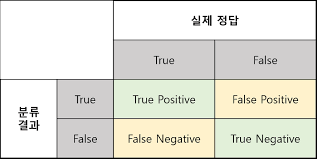

In [ ]:
# Confusion Matrix 출력


**(2) Tree 시각화**
- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값(y label)에 해당하는 데이터 건수

In [ ]:
# Tree 시각화

**(3) 모델 교차 검증**
- 5-Fold Cross Validation: 데이터셋을 5개의 부분(폴드)으로 나눈 후, 각 폴드에서 모델을 훈련하고 검증하는 과정을 반복하는 기법
- 검증 과정:
    1) 각 폴드를 한 번씩 검증 세트로 사용하고, 나머지 4개의 폴드로 모델을 훈련
    2) 예를 들어, 첫 번째 폴드를 검증 세트로 사용하면, 나머지 4개 폴드로 모델을 훈련
    3) 그런 다음, 훈련된 모델을 첫 번째 폴드에 대해 평가합니다.
    4) 이 과정을 5번 반복하여 각 폴드에 대해 모델의 성능을 평가

In [ ]:
# 교차 검증(5-Fold Cross Validation)


***

## **6. 하이퍼파라미터 조정을 통해 모델 성능 향상 시키기**

In [ ]:
# 다양한 하이퍼파라미터 조정을 해가며 최적의 모델을 찾아보세요.